# **Описание проекта**
# Обучение с учителем: качество модели**

Интернет-магазин «В один клик» специализируется на продаже различных товаров, включая детские товары, товары для дома, мелкую бытовую технику, косметику и продукты питания. В прошлом отчетном периоде магазин заметил снижение активности покупателей. Это может быть связано с тем, что большая часть целевой аудитории уже знакома с магазином, и привлечение новых клиентов становится менее эффективным.

Руководство магазина решило сосредоточиться на удержании существующих клиентов, чтобы повысить их покупательскую активность. Для этого они хотят внедрить систему персонализированных предложений, которая будет учитывать индивидуальные предпочтения каждого клиента.

**Цель** - разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Руководство одобрило алгоритм действий**

- Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
- В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
- Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

**Описание данных**

- ***market_file.csv*** - таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
  - id — номер покупателя в корпоративной базе данных.
  - Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
  - Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
  - Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
  - Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
  - Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
  - Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
  - Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
  - Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
  - Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
  - Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
  - Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
  - Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


- ***market_money.csv*** - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
  - id — номер покупателя в корпоративной базе данных.
  - Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
  - Выручка — сумма выручки за период.
  
- ***market_time.csv*** - таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
  - id — номер покупателя в корпоративной базе данных.
  - Период — название периода, во время которого зафиксировано общее время.
  - минут — значение времени, проведённого на сайте, в минутах.
  
- ***money.csv*** - таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
  - id — номер покупателя в корпоративной базе данных.
  - Прибыль — значение прибыли.
  
  
**Алгоритм действий**

Решить задачу необходимо в два этапа:

- Разработать модель, которая предскажет вероятность снижения покупательской активности.
- Выделить сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность. 
  - Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.
  - Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.
  - Группа клиентов, которые покупают товары из категории «Товары для себя» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».
  - Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.


# **Шаг 1. Загрузка данных**

In [1]:
!pip install shap -q
!pip -q install phik

**Импортируем библиотеки**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score

from phik.report import plot_correlation_matrix
import shap

**Импортируем фреймы**

In [3]:
market_file = pd.read_csv('/datasets/market_file.csv')
display (market_file.head())
print (market_file.info())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [4]:
market_money = pd.read_csv('/datasets/market_money.csv')
display (market_money.head())
print (market_money.info())

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None


In [5]:
market_time = pd.read_csv('/datasets/market_time.csv')
display (market_time.head())
print (market_time.info())

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None


In [6]:
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=",")
display (money.head())
print (money.info())

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
None


**Вывод по Шагу 1**

- явных пропусков во фреймах нет 
- необходимо привести все наименования столбцов к хорошему стилю 
- проверить на дубли 

Данных для исследования достаточно, можно продолжить работу с данными 

# **Шаг 2. Предобработка данных**

Приведем все наименования к нижнему регистру и уберем пробелы 

In [7]:
def columns_change(df):
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    
columns_change(market_file)
columns_change(market_money)
columns_change(market_time)
columns_change(money)

Проверим на наличие явных дублей

In [8]:
print (market_file.duplicated().sum())
print (market_money.duplicated().sum())
print (market_time.duplicated().sum())
print (money.duplicated().sum())

0
0
0
0


Проверим наличие неявных дубликатов

In [9]:
print (market_file['покупательская_активность'].unique())
print (market_file['тип_сервиса'].unique())
print (market_file['популярная_категория'].unique())
print (market_money['период'].unique())
print (market_time['период'].unique())

['Снизилась' 'Прежний уровень']
['премиум' 'стандартт' 'стандарт']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']
['текущий_месяц' 'предыдцщий_месяц']


In [10]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].str.replace('стандартт','стандарт')
market_time['период'] = market_time['период'].str.replace('предыдцщий_месяц','предыдущий_месяц')


print (market_file['тип_сервиса'].unique())
print (market_time['период'].unique())

['премиум' 'стандарт']
['текущий_месяц' 'предыдущий_месяц']


**Вывод по Шагу 2.**
- привели все наименования столбцов к нижнему регистру и заменили пробелы на "_"
- проверено на наличие явных дубликатов - их нет 
- обработаны неявные дубликаты
- тип данных корректен 
- пропусков явных нет 

Данные подготовлены к дальнейшей работе.

# **Шаг 2. Исследовательский анализ данных**

**Фрейм market_file**

In [11]:
market_file.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


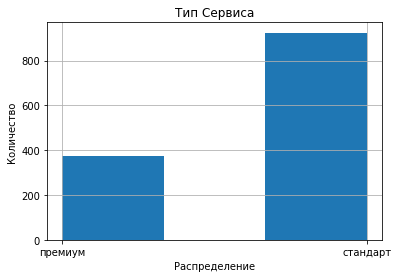

In [12]:
market_file['тип_сервиса'].hist(bins=3)
plt.title('Тип Сервиса')
plt.xlabel('Распределение')
plt.ylabel('Количество')
plt.show()

Количество пользователей с премиумом значительно меньше, чем стандарт, далее надо будет это учитывать при обучение, т.к. это целевой признак

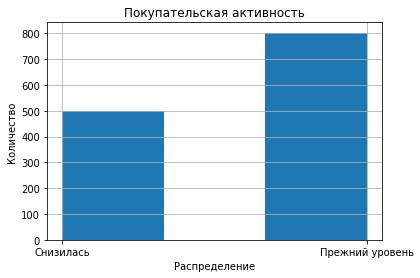

In [13]:
market_file['покупательская_активность'].hist(bins=3)
plt.title('Покупательская активность')
plt.xlabel('Распределение')
plt.ylabel('Количество')
plt.show()

У целевого признака "Покупательская активность" также есть неравное распределение, необходимо будет учитывать

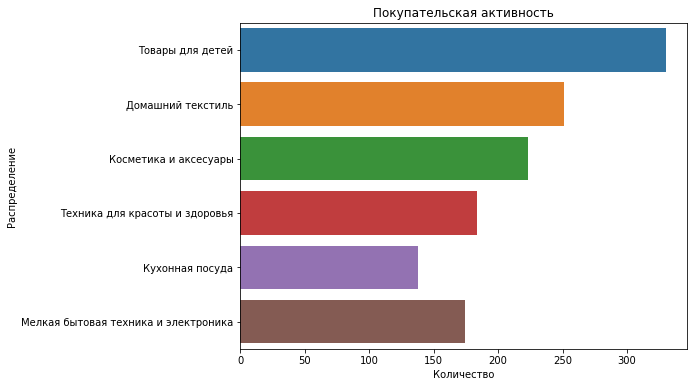

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(y='популярная_категория', data=market_file)
plt.title('Покупательская активность')
plt.xlabel('Количество')
plt.ylabel('Распределение')
plt.show()

Наблюдаем нормальное распределение, товары для детей имеют наибольший спрос 

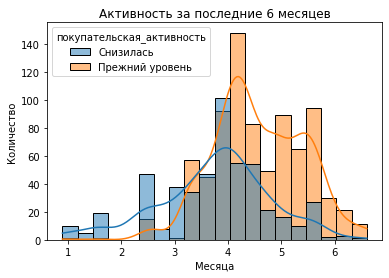

In [15]:
sns.histplot(market_file, bins=20, kde=True, hue='покупательская_активность', x='маркет_актив_6_мес')
plt.title('Активность за последние 6 месяцев')
plt.xlabel('Месяца')
plt.ylabel('Количество')
plt.show()

Наблюдался рост в период с 3 по 5 месяц 

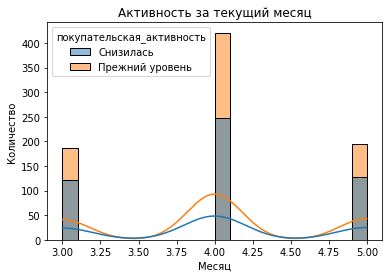

In [16]:
sns.histplot(market_file, bins=20, kde=True, hue='покупательская_активность', x='маркет_актив_тек_мес')
plt.title('Активность за текущий месяц')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

Активность можно поделить на 3 группы 

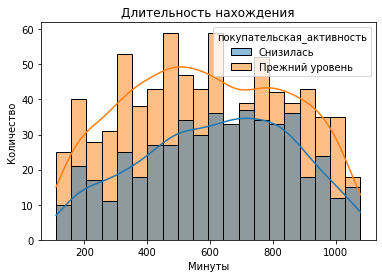

In [17]:
sns.histplot(market_file, bins=20, kde=True, hue='покупательская_активность', x='длительность')
plt.title('Длительность нахождения')
plt.xlabel('Минуты')
plt.ylabel('Количество')
plt.show()

Наблюдаем нормальное распределние

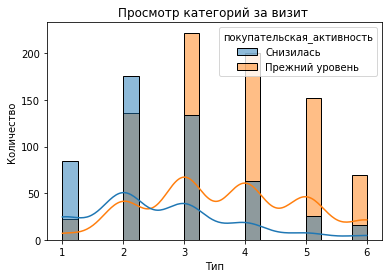

In [18]:
sns.histplot(market_file, bins=20, kde=True, hue='покупательская_активность', x='средний_просмотр_категорий_за_визит')
plt.title('Просмотр категорий за визит ')
plt.xlabel('Тип')
plt.ylabel('Количество')
plt.show()

Более подробное посещение категорий мы наблюдали выше

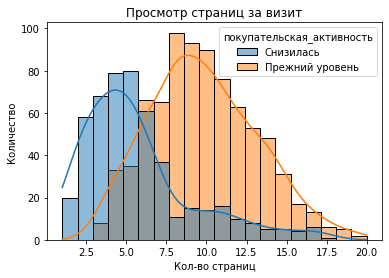

In [19]:
sns.histplot(market_file, bins=20, kde=True, hue='покупательская_активность', x='страниц_за_визит')
plt.title('Просмотр страниц за визит')
plt.xlabel('Кол-во страниц')
plt.ylabel('Количество')
plt.show()

Пользователи пролистывают в среднем 7-12 страниц

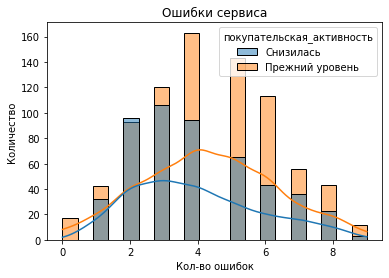

In [20]:
sns.histplot(market_file, bins=20, kde=True, hue='покупательская_активность', x='ошибка_сервиса')
plt.title('Ошибки сервиса')
plt.xlabel('Кол-во ошибок')
plt.ylabel('Количество')
plt.show()

Ошибки происходят зачастую каждые 3-5 заходов

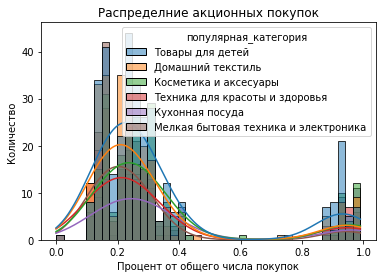

In [21]:
sns.histplot(market_file, bins=40, kde=True, hue='популярная_категория', x='акционные_покупки')
plt.title('Распределние акционных покупок')
plt.xlabel('Процент от общего числа покупок')
plt.ylabel('Количество')
plt.show()

В среднем только 20% от всех покупок осуществляют из-за акций, независимо от категории товара

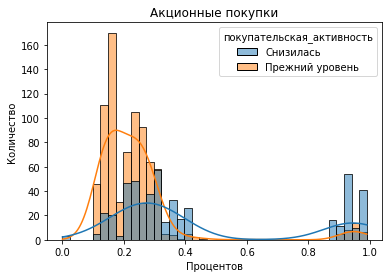

In [22]:
sns.histplot(market_file, bins=40, kde=True, hue='покупательская_активность', x='акционные_покупки')
plt.title('Акционные покупки')
plt.xlabel('Процентов')
plt.ylabel('Количество')
plt.show()

Значительное количество клиентов активно отслеживает наличие скидок.

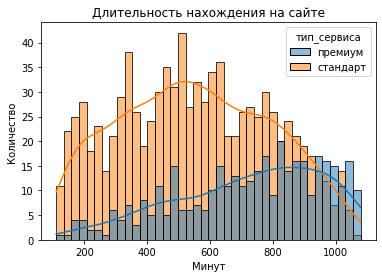

In [23]:
sns.histplot(market_file, bins=40, kde=True, hue='тип_сервиса', x='длительность')
plt.title('Длительность нахождения на сайте')
plt.xlabel('Минут')
plt.ylabel('Количество')
plt.show()

Пользователи с премиумом находятся в среднем меньше, нежели со стандартной подпиской 

**Фрейм market_money**

In [24]:
market_money.describe()

,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


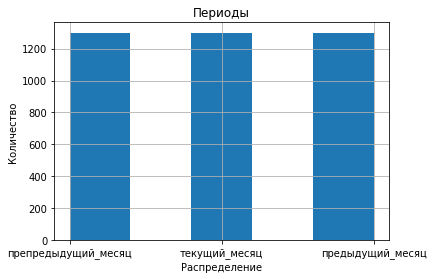

In [25]:
market_money['период'].hist(bins=5)
plt.title('Периоды')
plt.xlabel('Распределение')
plt.ylabel('Количество')
plt.show()

Наблюдаем равное распределение

<AxesSubplot:ylabel='выручка'>

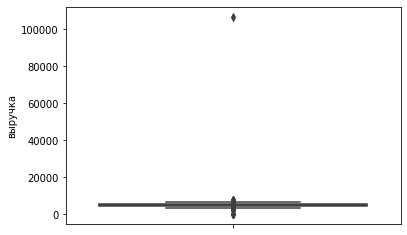

In [26]:
sns.boxplot(data=market_money, y='выручка')

наблюдаем выброс, удалим его 

<AxesSubplot:ylabel='выручка'>

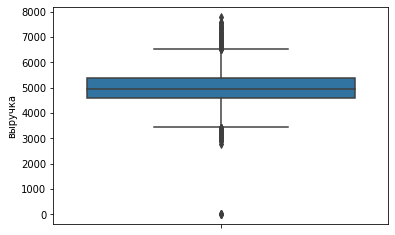

In [27]:
market_money = market_money[market_money['выручка'] < 20000]
sns.boxplot(data=market_money, y='выручка')

Теперь мы можем видеть нулевые записи, их также удалим 

<AxesSubplot:ylabel='выручка'>

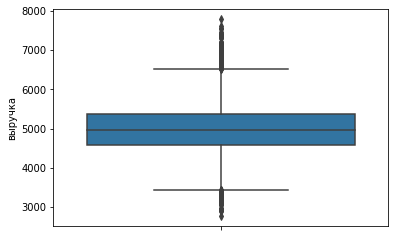

In [28]:
market_money = market_money[market_money['выручка'] > 0]
sns.boxplot(data=market_money, y='выручка')

Теперь наблюдаем нормальное распределние с незначительными выбросами

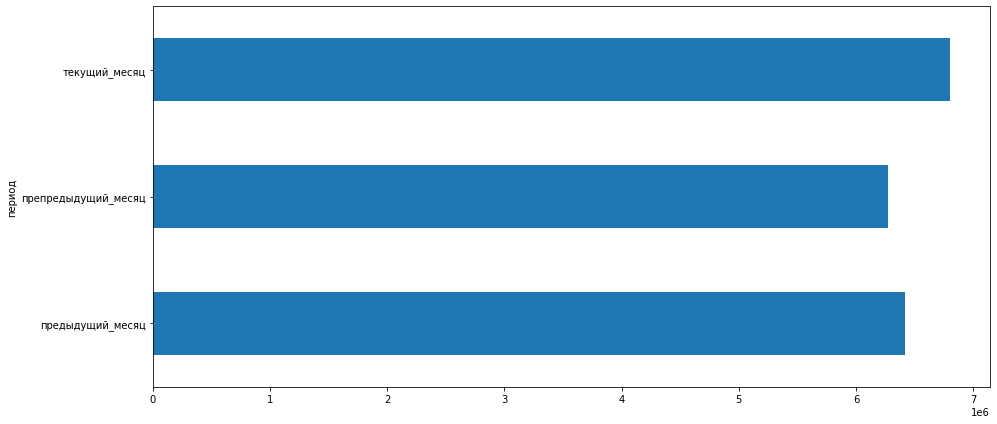

In [29]:
df_market_money = market_money[['период', 'выручка']]
df_market_money_sum = df_market_money.groupby('период')['выручка'].sum()
df_market_money_sum.plot(kind='barh', figsize=(15,7))
plt.show()

Возьмем только те записи, где есть данные за все 3 месяца, это необходимо, для корректного обучения модели

отфильровалось только 4 записи 

In [30]:
grouped_market_money = market_money.groupby('id').agg({'период': ['count']})

grouped_market_money.columns = ['count']

market_file = market_file[market_file['id'].isin(grouped_market_money[grouped_market_money['count'] == 3].index)]

len(market_file)

1296

Наблюдаем нормальное распределение

**Фрейм market_time**

In [31]:
market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


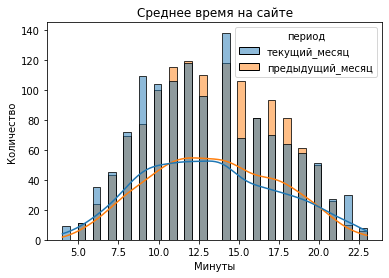

In [32]:
sns.histplot(market_time, bins=40, kde=True, hue='период', x='минут')
plt.title('Среднее время на сайте')
plt.xlabel('Минуты')
plt.ylabel('Количество')
plt.show()

Наблюдаем нормальное распредление по времени

**Фрейм money**

In [33]:
money.describe()

,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


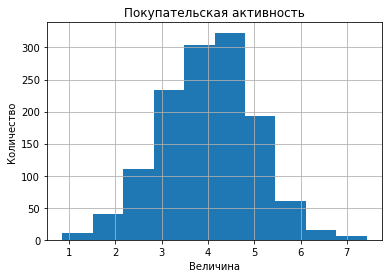

In [34]:
money['прибыль'].hist(bins=10)
plt.title('Покупательская активность')
plt.xlabel('Величина')
plt.ylabel('Количество')
plt.show()

Нормальное распределение

**Вывод по Шагу 3.**
- проведен исследовательский анализ 
- проверили распределение данных 
- удалены выбросы для дальнейшей корректной работы

**Исследование показало, что клиенты, которые совершают покупки реже, отличаются от лояльных клиентов несколькими признаками.**
- Время, проведенное на сайте: клиенты, которые совершают покупки реже, проводят меньше времени на сайте, не сравнивают товары и не выбирают лучшие варианты. Они просматривают один-два товара и сразу совершают покупку.
- Коммуникация с клиентом: клиенты, которые совершают покупки реже, не реагируют на маркетинговые сообщения и спам на почту.
- Категории товаров: клиенты, которые совершают покупки реже, интересуются меньшим количеством категорий товаров.
- Количество страниц за визит: клиенты, которые совершают покупки реже, просматривают меньше страниц за визит.
- Время, проведенное на сайте в текущем месяце: клиенты, которые совершают покупки реже, проводят меньше времени на сайте в текущем месяце.
- Значительная часть клиетов следят за акционными предложениями 

Данные подготовлены для дальнейшей работы

# **Шаг 4. Объединение таблиц**

In [35]:
#Подготовка таблицы market_money
market_money_for_join = market_money.pivot_table(index=['id'], columns=["период"])
market_money_for_join.columns = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
market_money_for_join['id'] = market_money_for_join.index

#Подготовка таблицы market_time
market_time_for_join = market_time.pivot_table(index=['id'], columns=["период"])
market_time_for_join.columns = ['минут_предыдущий_месяц', 'минут_текущий_месяц']
market_time_for_join['id'] = market_time_for_join.index

# Объединение с таблицей market_money
market_final = market_file.join(market_money_for_join, on='id', lsuffix="_left", rsuffix="_выручка")
market_final = market_final.rename(columns={'id_left':'id'})

# Объединение с таблицей market_time
market_final = market_final.join(market_time_for_join, on='id', lsuffix="_left", rsuffix="_минут")
market_final = market_final.rename(columns={'id_left':'id'})

#Убираем лишнее 
market_final = market_final.drop(['id_выручка', 'id_минут'], axis=1)
market_final.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


**Вывод по Шагу 4.**

Таблицы объединены

# **Шаг 5. Корреляционный анализ**

interval columns not set, guessing: ['id', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


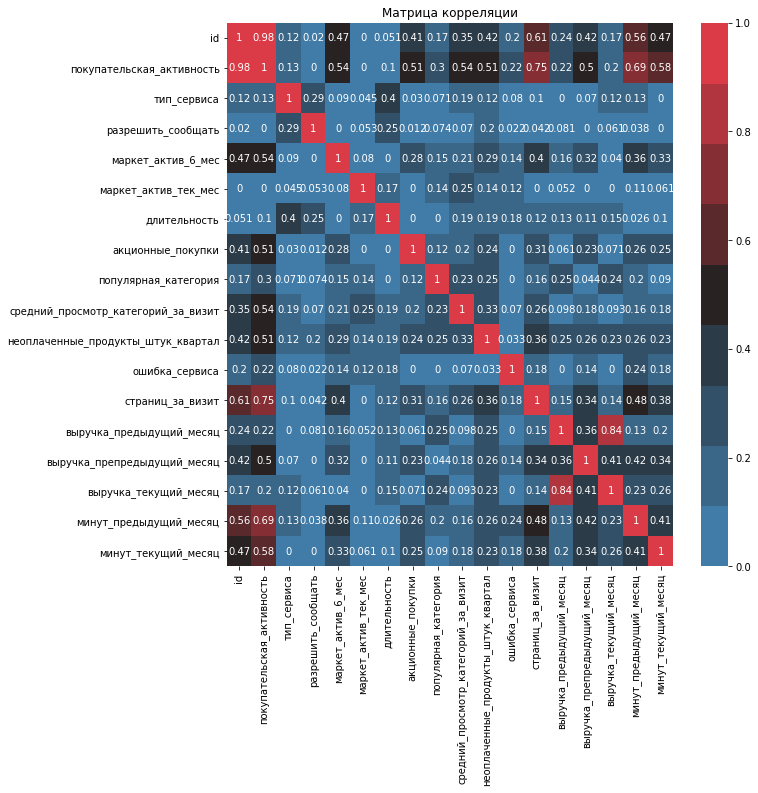

In [36]:
# Создание матрицы корреляции
corr_matrix = market_final.phik_matrix()

# Настройка цветовой схемы на зеленый
cmap = sns.diverging_palette(240, 10, n=9, center="dark")

# Создание и отображение матрицы корреляции
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap=cmap)
plt.title('Матрица корреляции')
plt.show()

Можем заметить, что покупательская активность это целевой признак 

interval columns not set, guessing: ['id', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable покупательская_активность for analysis 1. Dropping this column
  warnings.warn(


interval columns not set, guessing: ['id', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable покупательская_активность for analysis 1. Dropping this column
  warnings.warn(


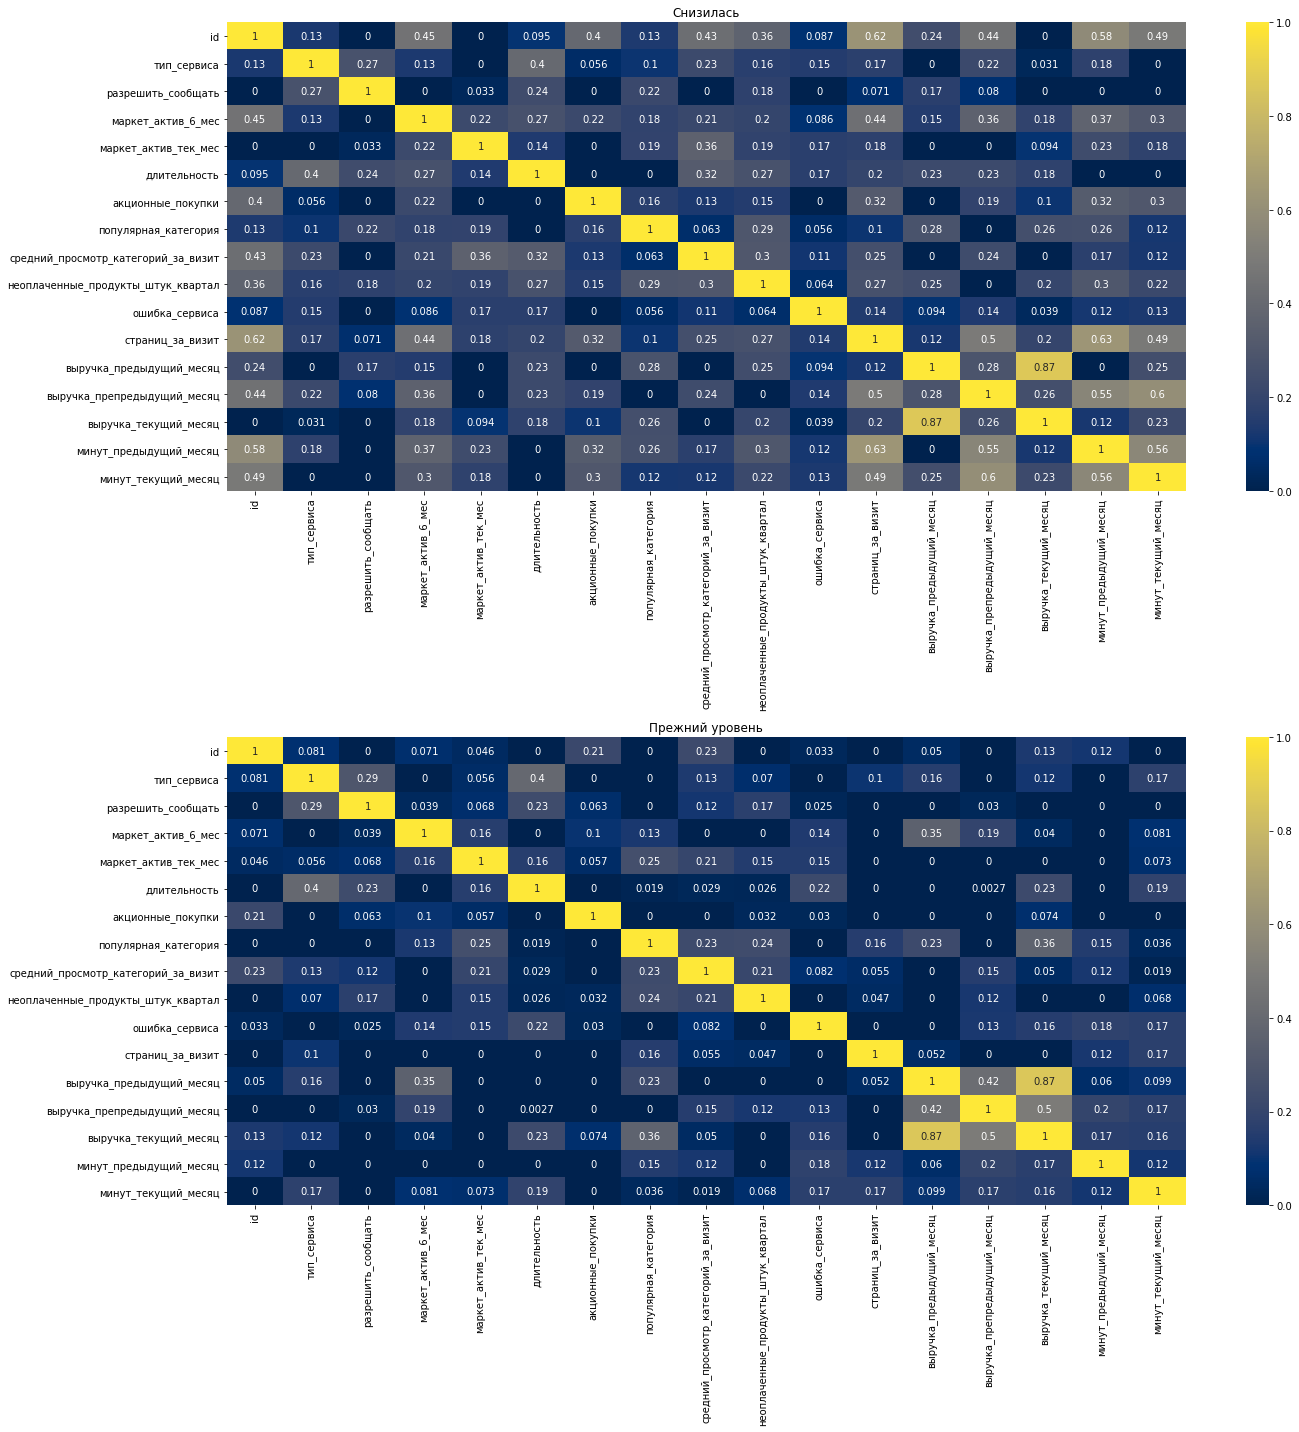

In [37]:
def phik_corr_matrix(df, col):
    fig, axs = plt.subplots(ncols=1, nrows=len(df[col].unique()), figsize=(20,20))
    for i, value in enumerate(df[col].unique()):
        df_i = df[df[col] == value]
        sns.heatmap(df_i.phik_matrix(), annot=True, cmap='cividis', ax=axs[i])
        axs[i].set_title(value)
    fig.tight_layout()
    plt.show()
    
phik_corr_matrix(market_final, 'покупательская_активность')

**Вывод по Шагу 5.**

Выявлены переменные, которые коррелируют с покупательской_активностью. Перечень таких переменных включает: «маркет_актив_6_мес», «акционные_покупки», «средний_просмотр_категорий_за_визит», «неоплаченные_продукты_штук_квартал», «страниц_за_визит», «выручка_препредыдущий_месяц», «минут_предыдущий_месяц», «минут_текущий_месяц».

Самая сильная корреляция наблюдается между покупательской активностью и переменными «Выручка_предыдущий_месяц» и «Выручка_текущий_месяц». Однако уровень корреляции ниже 0.9, поэтому эти переменные не будут удалены из набора данных.

# **Шаг 6. Использование пайплайнов**

Поработаем с данными, прежде чем создавать пайплайн 

Кодираем признак 'покупательская_активность' в значение 0 и 1.

In [38]:
market_final['покупательская_активность'] = market_final['покупательская_активность'].apply(lambda x: 1 if x=='Снизилась' else 0 )
market_final['покупательская_активность'] = market_final['покупательская_активность'].astype(int) 

Лучше перевести признак "акционные_покупки" в категоральный признак, при покупках более 40% отнесем к частым покупкам по акции

In [39]:
market_final['акционные__покупки'] = market_final['акционные_покупки'].apply( lambda x: 'часто по акции' if x>= 0.4 else 'редко по акции' )
market_final = market_final.drop(['акционные_покупки'], axis=1)

Переведем 'id' в индекс датасета 

In [40]:
market_final = market_final.set_index('id')

In [41]:
market_final.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,акционные__покупки
id,,,,,,,,,,,,,,,,,
215349,1,премиум,да,4.4,4,819,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,часто по акции
215350,1,стандарт,нет,4.9,3,539,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,редко по акции
215351,1,стандарт,да,3.2,5,896,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,часто по акции
215352,1,стандарт,нет,5.1,3,1064,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,часто по акции
215353,1,стандарт,да,3.3,4,762,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,редко по акции


In [42]:
market_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1296 non-null   int64  
 1   тип_сервиса                          1296 non-null   object 
 2   разрешить_сообщать                   1296 non-null   object 
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   популярная_категория                 1296 non-null   object 
 7   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 8   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 9   ошибка_сервиса                       1296 non-null   int64  
 10  страниц_за_визит                     1296 non-null   int64  
 11  выручка_предыдущий_меся

In [43]:
#!pip install scikit-learn==1.1.3

In [44]:
#Константы
RANDOM_STATE = 42
TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    market_final.drop(['покупательская_активность'], axis=1),
    market_final['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market_final['покупательская_активность'])

X_train.shape, X_test.shape


((1036, 16), (260, 16))

Создаём списки с названиями признаков

In [45]:
ohe_columns = ['разрешить_сообщать', 'популярная_категория', 'тип_сервиса']
ord_columns = ['акционные__покупки']
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 
               'длительность', 'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 
               'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 
               'минут_предыдущий_месяц', 'минут_текущий_месяц']

Создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
SimpleImputer + OHE

In [46]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
    )

Создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
SimpleImputer + OE

In [47]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['редко по акции','часто по акции']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

Создаём общий пайплайн для подготовки данных

In [48]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

Создаём итоговый пайплайн: подготовка данных и модель

In [49]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

Перебираем гиперпараметры моделей

In [50]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 9),
        'models__max_features': range(2, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(2, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='poly')],
        'models__degree': range(2, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

Автоматический подбор с помощью RandomizedSearchCV

In [51]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [52]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse=False))]),
                                                                               ['разрешить_сообщать',
                                                                                'популярная_категория',
                                                                                'тип_сервиса']),
                                                                              ('ord',...
                                        {'models': [LogisticRegression(C=3,
                                                                       penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(2, 9),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(kernel='poly',
                                                        random_state=42)],
                                         'models__degree': range(2, 9),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

Вывод лучшей модели и метрик

In [53]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория',
                                                   'тип_сервиса']),
                               

Работа модели на тестовой выборке

In [54]:
y_test_pred = randomized_search.predict(X_test)
y_test_proba = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_test_proba[:,1]), 2)}')
print(f'Метрика F1-score на тестовой выборке: {round(f1_score(y_test, y_test_pred, average="macro"), 2)}')

Метрика ROC-AUC на тестовой выборке: 0.91
Метрика F1-score на тестовой выборке: 0.89


**Вывод по Шагу 6.**

Определена лучшая модель: 
- LogisticRegression(C=3, penalty='l1', random_state=42, solver='liblinear'))])
- Метрика roc_aucобучена модель  = 0,9, что является хорошим результатом 
- Обученная модельхорошо справилась с предсказаниями с тестовой выборкой, о чем свидетельствуют метрики ROC-AUC = 0.91 и F1 = 0.9






# **Шаг 7. Анализ важности признаков**

In [55]:
#!pip install shap 

Создаем X_train_new с помощью применения препроцессора к X_train.

In [56]:
X_train_new = randomized_search.best_estimator_['preprocessor'].transform(X_train)

Создаем X_test_new с помощью применения того же препроцессора, что и для X_train, к X_test.

In [57]:
X_test_new = randomized_search.best_estimator_['preprocessor'].transform(X_test)

Получаем названия столбцов 

In [58]:
feature_names = randomized_search.best_estimator_['preprocessor'].get_feature_names_out()

Преобразуем X_test_new в DataFrame с соответствующими столбцами.

In [59]:
X_test_new = pd.DataFrame(X_test_new, columns=feature_names)

Объяснение explainer для модели, используя линейный интерпретатор SHAP.

In [60]:
explainer = shap.LinearExplainer(randomized_search.best_estimator_['models'], X_train_new)

Вычисляем значения SHAP для X_test_new, используя explainer.

In [61]:
shap_values = explainer(X_test_new) 

Выводим график влияния SHAP - график "пчелиных сот" с максимальным количеством 25.

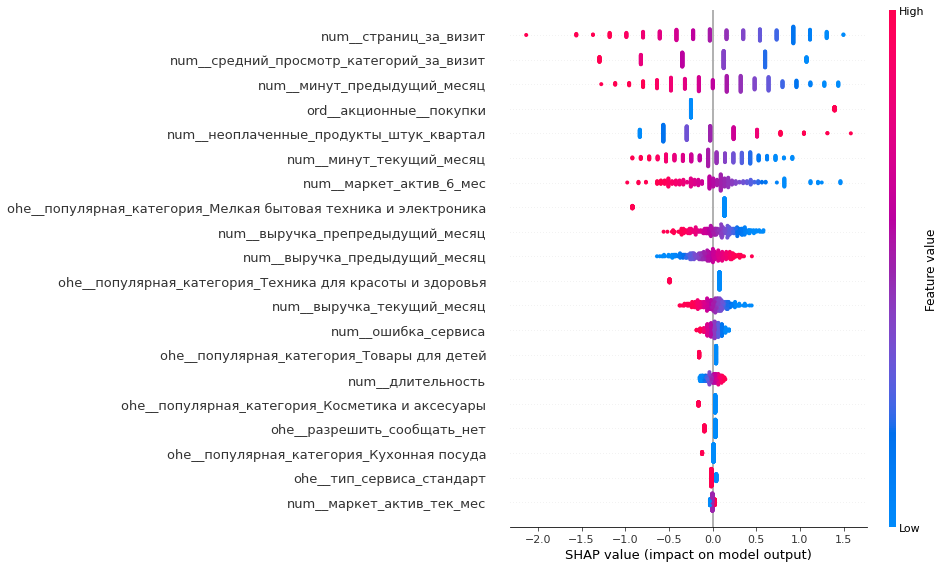

In [62]:
shap.plots.beeswarm(shap_values, max_display=25)

**Вывод по Шагу 7.**

Четыре самых важных признака для модели: 
- Страниц_за_визит
- Средний_просмотр_категорий_за_визит
- мин_предыдущий_месяц
- мин_текущий_месяц

Наимения важные признаки: 
- Популярная категория 
- Маркет_актив_тек_мес
- Разрешить сообщать
- Тип_сервиса
- Ошибка_сервиса
- Выручка_предыдущий_месяц

Если говорить о том, как увеличить частоту покупок и прибыль от них, то стоит обратить внимание на время, которое пользователь проводит на маркетплейсе, и количество товаров, добавленных им в корзину. Даже если он приобретает товар только в одной категории, важно предоставить ему возможность выборать среди всех возможных брендов, показать самые популярные модели.  

# **Шаг 8. Сегментация покупателей**

Логично будет для начала разобрать как активность пользователей влияет на прибыль компании 

Используя результаты моделирования и выгрузку **money** создадим один фрейм 

In [63]:
y_test_proba = randomized_search.predict_proba(X_test)[:,1]
y_train_proba = randomized_search.predict_proba(X_train)[:,1]

#создадим копии X_train и X_test и сохраним в переменные
X_train_money = X_train.copy()
X_test_money = X_test.copy()
X_test_money['вероятность_снижения_активности'] = y_test_proba
X_train_money['вероятность_снижения_активности'] = y_train_proba

#Объединим таблицы по id
money = money.set_index('id')
df_money = pd.concat([X_train_money, X_test_money])

df_money = df_money.join(money)

#Выведем результат
display (df_money.head())
print (df_money.info())

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,акционные__покупки,вероятность_снижения_активности,прибыль
id,,,,,,,,,,,,,,,,,,
215884,стандарт,да,4.3,5,997,Мелкая бытовая техника и электроника,5,1,3,11,4113.0,4626.0,3798.4,13,10,редко по акции,0.062409,4.37
216003,премиум,да,5.5,5,913,Кухонная посуда,3,1,7,10,3903.0,4833.0,3227.0,17,23,редко по акции,0.035394,4.87
215685,стандарт,нет,4.4,5,517,Товары для детей,1,2,5,11,3130.0,4382.0,4345.5,11,12,редко по акции,0.459669,4.33
216442,стандарт,да,3.8,4,907,Косметика и аксесуары,2,1,8,4,3829.0,4837.0,3085.4,13,20,редко по акции,0.446770,5.10
215718,стандарт,нет,3.1,5,447,Домашний текстиль,2,4,6,4,5562.5,4217.0,6220.3,8,9,редко по акции,0.960381,4.84


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215884 to 215633
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   тип_сервиса                          1296 non-null   object 
 1   разрешить_сообщать                   1296 non-null   object 
 2   маркет_актив_6_мес                   1296 non-null   float64
 3   маркет_актив_тек_мес                 1296 non-null   int64  
 4   длительность                         1296 non-null   int64  
 5   популярная_категория                 1296 non-null   object 
 6   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 7   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 8   ошибка_сервиса                       1296 non-null   int64  
 9   страниц_за_визит                     1296 non-null   int64  
 10  выручка_предыдущий_месяц             1296 non-null   float64
 11  выручка_препредыдущий_м

Данные соединены в одну таблицу, начнем изучение групп покепателей

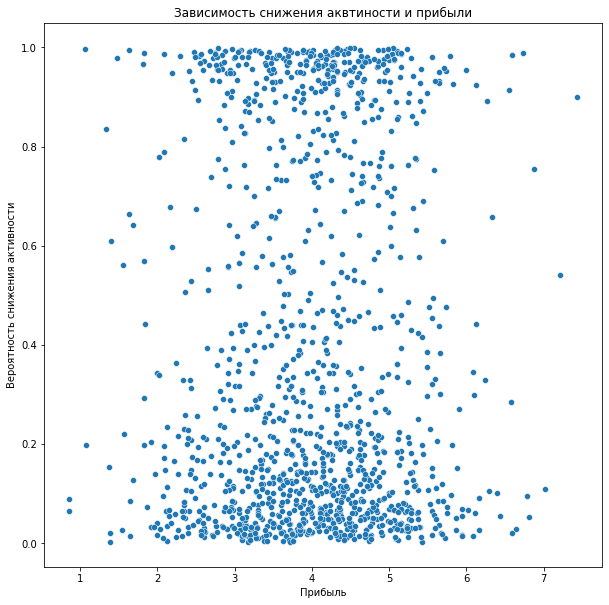

In [64]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=df_money, y='вероятность_снижения_активности', x='прибыль')
plt.xlabel('Прибыль')
plt.ylabel('Вероятность снижения активности')
plt.title('Зависимость снижения аквтиности и прибыли')
plt.show()

Не наблюдается какая либо завитсимость между активностью покупателей и прибылью. Необходимо рассмотреть другие признаки, которые влияют на снижение активности

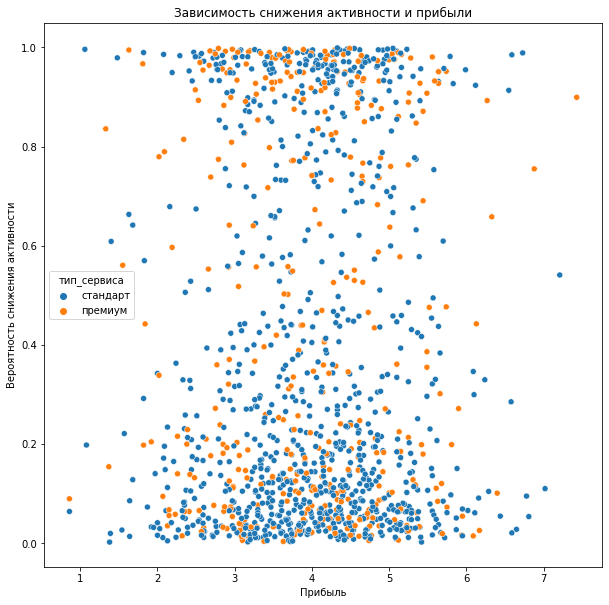

In [65]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=df_money, x="прибыль", y="вероятность_снижения_активности", hue = 'тип_сервиса')
plt.xlabel('Прибыль')
plt.ylabel('Вероятность снижения активности')
plt.title('Зависимость снижения активности и прибыли')
plt.show()

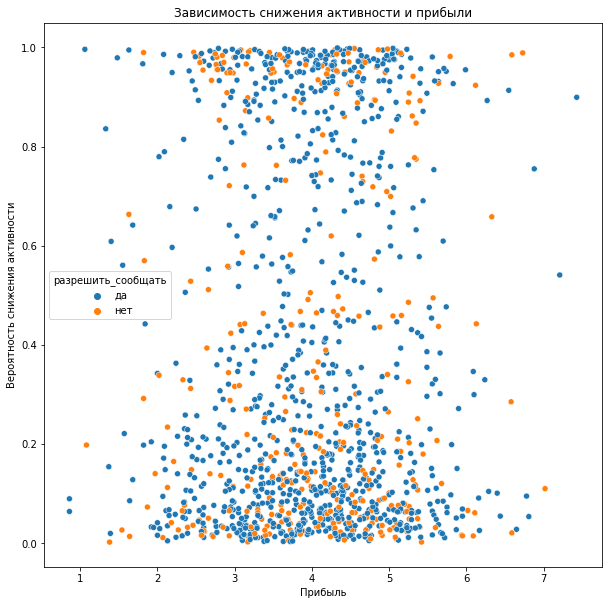

In [66]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=df_money, x="прибыль", y="вероятность_снижения_активности", hue = 'разрешить_сообщать')
plt.xlabel('Прибыль')
plt.ylabel('Вероятность снижения активности')
plt.title('Зависимость снижения активности и прибыли')
plt.show()

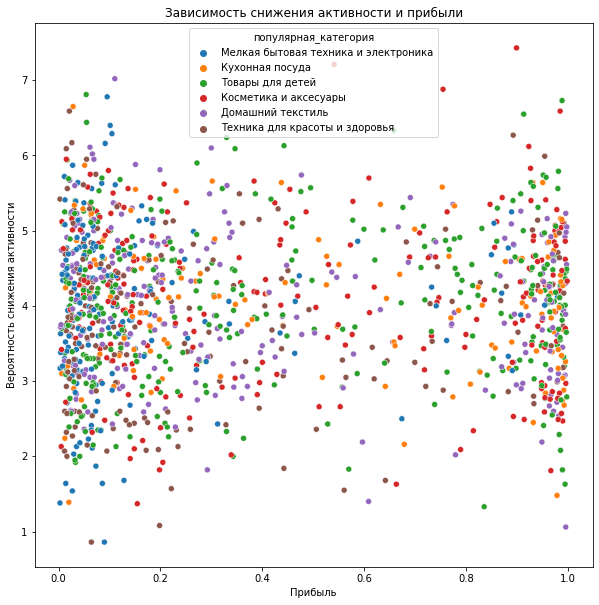

In [67]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=df_money, x="вероятность_снижения_активности", y="прибыль", hue = 'популярная_категория')
plt.xlabel('Прибыль')
plt.ylabel('Вероятность снижения активности')
plt.title('Зависимость снижения активности и прибыли')
plt.show()

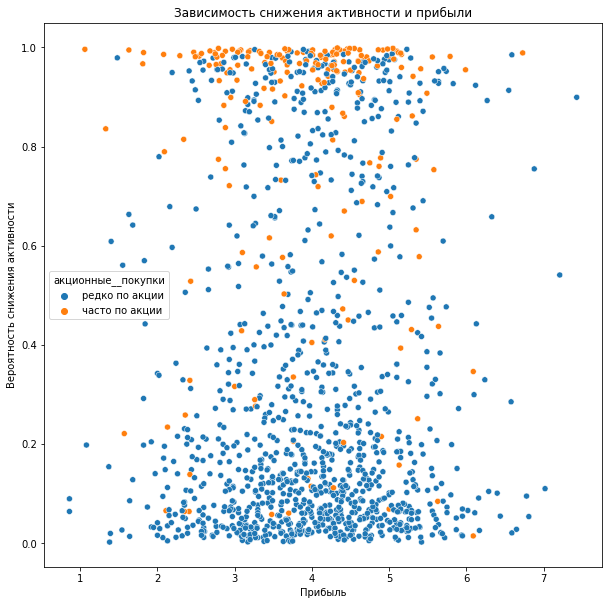

In [68]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=df_money, x="прибыль", y="вероятность_снижения_активности", hue = 'акционные__покупки')
plt.xlabel('Прибыль')
plt.ylabel('Вероятность снижения активности')
plt.title('Зависимость снижения активности и прибыли')
plt.show()

Посмотрев все категориальные признаки, можно заметить, что те кто берет товары часто по акции имеют наибольшую вероятность к снижению активности. Остальные признаки особо не влияют на активность. 

Рассмотрим тогда сегмент покупаетлей, которые ориентируются на акционные предложения

Создадим еще один стобец, куда отнесем покупаетелй, которые в основном покупают по акции 

In [69]:
df_money['анализ_пользователей'] = df_money.apply( lambda row: 'Фокус группа' 
        if row['вероятность_снижения_активности'] > 0.65 and row['акционные__покупки']=='часто по акции' 
        else 'Остальные пользователи' 
      , axis=1)

df_money.head()
df_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215884 to 215633
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   тип_сервиса                          1296 non-null   object 
 1   разрешить_сообщать                   1296 non-null   object 
 2   маркет_актив_6_мес                   1296 non-null   float64
 3   маркет_актив_тек_мес                 1296 non-null   int64  
 4   длительность                         1296 non-null   int64  
 5   популярная_категория                 1296 non-null   object 
 6   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 7   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 8   ошибка_сервиса                       1296 non-null   int64  
 9   страниц_за_визит                     1296 non-null   int64  
 10  выручка_предыдущий_месяц             1296 non-null   float64
 11  выручка_препредыдущий_м

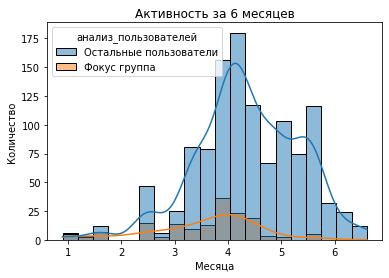

In [70]:
sns.histplot(df_money, bins=20, kde=True, hue='анализ_пользователей', x='маркет_актив_6_мес')
plt.title('Активность за 6 месяцев')
plt.xlabel('Месяца')
plt.ylabel('Количество')
plt.show()

Возможно на 4 месяц призходились скидки/распродажи 

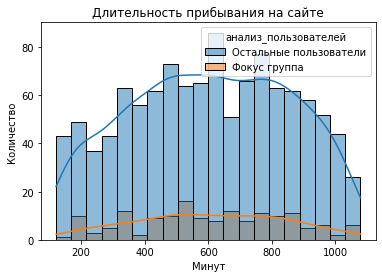

In [71]:
sns.histplot(df_money, bins=20, kde=True, hue='анализ_пользователей', x='длительность')
plt.title('Длительность прибывания на сайте')
plt.xlabel('Минут')
plt.ylabel('Количество')
plt.show()

Пользователя, которые покупают по акции проводят заметно меньше времени 

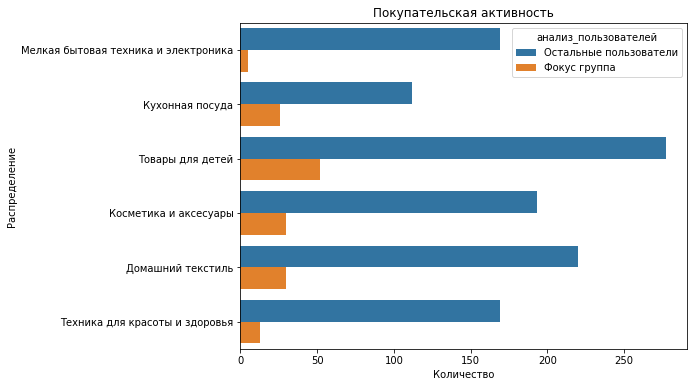

In [72]:
plt.figure(figsize=(8,6))
sns.countplot(y='популярная_категория', data=df_money, hue='анализ_пользователей')
plt.title('Покупательская активность')
plt.xlabel('Количество')
plt.ylabel('Распределение')
plt.show()

Чаще всего по акции покупают Товары для детей, возможно это игрушки или какие то расходники 

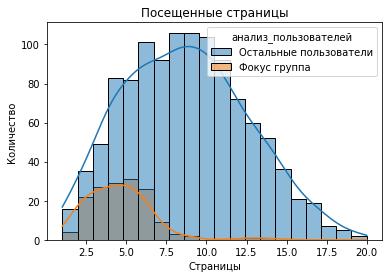

In [73]:
sns.histplot(df_money, bins=20, kde=True, hue='анализ_пользователей', x='страниц_за_визит')
plt.title('Посещенные страницы')
plt.xlabel('Страницы')
plt.ylabel('Количество')
plt.show()

Пользователи, которые покупают по акции в основном доходят по 5-6 страницы

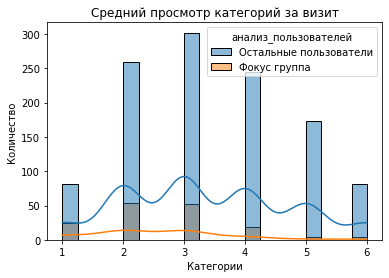

In [74]:
sns.histplot(df_money, bins=20, kde=True, hue='анализ_пользователей', x='средний_просмотр_категорий_за_визит')
plt.title('Средний просмотр категорий за визит')
plt.xlabel('Категории')
plt.ylabel('Количество')
plt.show()

Как и на граффике выше, можем заметить, что смотрят в основном категории "Товаря для детей" и "Кухонные товары"

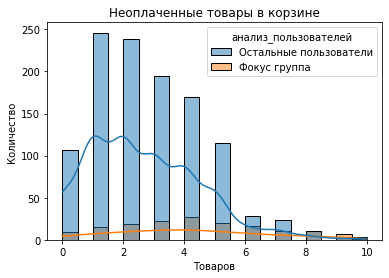

In [75]:
sns.histplot(df_money, bins=20, kde=True, hue='анализ_пользователей', x='неоплаченные_продукты_штук_квартал')
plt.title('Неоплаченные товары в корзине')
plt.xlabel('Товаров')
plt.ylabel('Количество')
plt.show()

Фокус группа показывает себя аналогично Остальным пользователям

**Вывод по Шагу 7.**

Рассмотрены особенности сегмента покупателей, которые часто пользуются скидками и имеют высокую вероятсноть снижения активности. Эти пользователи обычно проводят мало времени на сайте, просматривают 1-4 страниццы, не сравнивают товары и не выбирают лучшие варианты. Вместо этого они просматривают нужные товары и покупают их, редко когда товары остаются просто в корзине.

Для таких пользователей стимулом к покупкам возможно послужит рассылка промокодов или информарование их о начале распродаж. Возможно на главной странице нужно сделать раздел "Горячие предлождения", за счет этого можно попробовать привлечь больше их внимания.

**Гипотеза, почему снизилась активность**

Это может быть связано с несколькими факторами. 
- Возможно, клиенты, которые часто покупают по акции, начинают чувствовать усталость от постоянных предложений и акций, и это приводит к снижению их активности. 
- Также возможно, что эти клиенты стали более избирательными в своих покупках и предпочитают покупать только товары, которые действительно соответствуют их потребностям и интересам.
- Еще одним возможным объяснением снижения активности клиентов, которые часто покупают по акции, может быть то, что они изначально пришли на сайт только ради определенной акции или товара. Когда акция закончилась, они перестали пользоваться сервисом. Если это так, то важно понять, какая категория товаров была особенно интересна этим клиентам. Это поможет предложить им что-то похожее, чтобы они могли привыкнуть к сервису и начать самостоятельно искать и покупать товары.


# **Шаг 9. Общий вывод**

Целью данного исследования было создание модели, способной предсказать снижение покупательской активности пользователей интернет-магазина "В один клик". Кроме того, исследователи хотели изучить определенный сегмент покупателей.

Что было проделано в этом проекте, пошаговое описание: 

- Для проведения исследования были загружены четыре CSV-файла с данными о поведении покупателей на сайте, коммуникациях с ними и их продуктовом поведении, а также о выручке магазина, времени, проведенном на сайте, и среднемесячной прибыли.


- Перед анализом данных была проведена предварительная обработка, включающая стандартизацию имен признаков, обработку явных и неявных дублей и пропусков.


- На следующем этапе были построены диаграммы распределения всех признаков. Также было отмечено, что признак "Акционные покупки" имеет два ярко выраженных кластера, поэтому он был преобразован в категориальный.


- Был проведен корреляционный анализ данных, который показал, что целевой признак "Покупательская активность" имеет корреляцию с такими полями, как "Маркет_актив_6_мес", "Акционные_покупки", "Средний_просмотр_категорий_за_визит", "Неоплаченные_продукты_штук_квартал", "Страниц_за_визит", "Выручка_препредыдущий_месяц", "минут_предыдущий_месяц" и "минут_текущий_месяц". 


- Далее были объединены три датасета в один датафрейм.


- С использованием пайпланов из библиотеки sklearn были обучены модели KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC. Лучшие результаты показала модель LogisticRegression(C=3, penalty='l1', random_state=42, solver='liblinear').


- Анализ важности признаков показал, что наиболее значимыми являются признаки, связанные с временем, проведенным на сайте, а наименее важными - категории товаров и коммуникации с пользователем.


- Для сегментации пользователей был выбран сегмент покупателей, часто пользующихся скидками и имеющих высокую вероятность снижения покупательской активности. 

**Для стимулирования покупок у клиентов, часто пользующихся скидками, можно использовать следующие методы:**
- Рассылка промокодов: отправка персонализированных промокодов на электронную почту или через мобильное приложение может стимулировать клиентов к покупкам.
- Информационное уведомление о начале распродаж: своевременное информирование клиентов о начале распродажи может привлечь их внимание и стимулировать к покупкам.
- Раздел "Горячие предложения" на главной странице: создание специального раздела на главной странице сайта, где будут отображаться актуальные скидки и специальные предложения, может привлечь внимание клиентов и стимулировать их к покупкам.
- Персонализация предложений: использование данных о предпочтениях и поведении клиентов для создания индивидуальных предложений может повысить вероятность покупки.
- Программы лояльности: предоставление бонусных баллов или других привилегий за каждую покупку может стимулировать клиентов к повторным покупкам.
- Рекламные кампании: проведение рекламных кампаний в социальных сетях или на других платформах может привлечь новых клиентов и стимулировать существующих к покупкам.